# ติดตั้ง Apache Spark on Google Colab

In [1]:
!apt-get update                                                                          
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  
!pip install -q findspark==1.3.0                                                          

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,431 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http:

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
!pip install pyspark==3.1.2

     |████████████████████████████████| 212.4 MB 61 kB/s 
     |████████████████████████████████| 198 kB 47.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=7c72c0e221457016738266aa75fdfc0817b31c9d339ad9209dfc4d938e0df509
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()



---



# Load Data

In [5]:
data_flight_take_off = spark.read.csv('/content/M1_final.csv', header = True, inferSchema = True)



---



# Data Profiling

In [6]:
data_flight_take_off #ดูว่ามีคอลัมน์อะไรบ้าง

DataFrame[MONTH: int, DAY_OF_MONTH: int, DAY_OF_WEEK: int, OP_UNIQUE_CARRIER: string, TAIL_NUM: string, DEST: string, DEP_DELAY: int, CRS_ELAPSED_TIME: int, DISTANCE: int, CRS_DEP_M: int, DEP_TIME_M: int, CRS_ARR_M: int, Temperature: int, Dew Point: string, Humidity: int, Wind: string, Wind Speed: int, Wind Gust: int, Pressure: double, Condition: string, sch_dep: int, sch_arr: int, TAXI_OUT: int]

In [7]:
print((data_flight_take_off.count(), len(data_flight_take_off.columns))) #นับแถวและคอลัมน์

(28820, 23)


In [8]:
data_flight_take_off.dtypes #ดูชนิดของข้อมูล

[('MONTH', 'int'),
 ('DAY_OF_MONTH', 'int'),
 ('DAY_OF_WEEK', 'int'),
 ('OP_UNIQUE_CARRIER', 'string'),
 ('TAIL_NUM', 'string'),
 ('DEST', 'string'),
 ('DEP_DELAY', 'int'),
 ('CRS_ELAPSED_TIME', 'int'),
 ('DISTANCE', 'int'),
 ('CRS_DEP_M', 'int'),
 ('DEP_TIME_M', 'int'),
 ('CRS_ARR_M', 'int'),
 ('Temperature', 'int'),
 ('Dew Point', 'string'),
 ('Humidity', 'int'),
 ('Wind', 'string'),
 ('Wind Speed', 'int'),
 ('Wind Gust', 'int'),
 ('Pressure', 'double'),
 ('Condition', 'string'),
 ('sch_dep', 'int'),
 ('sch_arr', 'int'),
 ('TAXI_OUT', 'int')]

In [11]:
data_flight_take_off.summary("count").show()

+-------+-----+------------+-----------+-----------------+--------+-----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+-----+----------+---------+--------+---------+-------+-------+--------+
|summary|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM| DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity| Wind|Wind Speed|Wind Gust|Pressure|Condition|sch_dep|sch_arr|TAXI_OUT|
+-------+-----+------------+-----------+-----------------+--------+-----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+-----+----------+---------+--------+---------+-------+-------+--------+
|  count|28820|       28820|      28820|            28820|   28820|28820|    28820|           28820|   28820|    28820|     28820|    28820|      28820|    28820|   28820|28818|     28820|    28820|   28820|    28820|  28820|  28820|   28820|
+-------+-----+------------+

In [13]:
data_flight_take_off.where(data_flight_take_off.Wind.isNull()).show()

+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+-------------+-------+-------+--------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM|DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity|Wind|Wind Speed|Wind Gust|Pressure|    Condition|sch_dep|sch_arr|TAXI_OUT|
+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+-------------+-------+-------+--------+
|   12|          19|          4|               B6|  N648JB| FLL|       60|             189|    1069|     1275|      1335|       24|         24|       10|      55|null|         0|        0|   30.42|Mostly Cloudy|     21|     33|      41|
|   12|          19|          4|               9E|  

In [14]:
data_flight_take_off.show()

+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+------------+-------+-------+--------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM|DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity|Wind|Wind Speed|Wind Gust|Pressure|   Condition|sch_dep|sch_arr|TAXI_OUT|
+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+------------+-------+-------+--------+
|   11|           1|          5|               B6|  N828JB| CHS|       -1|             124|     636|      324|       323|      448|         48|       34|      58|   W|        25|       38|   29.86|Fair / Windy|      9|     17|      14|
|   11|           1|          5|               B6|  N992

In [15]:
data_flight_take_off.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEP_DELAY: integer (nullable = true)
 |-- CRS_ELAPSED_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- CRS_DEP_M: integer (nullable = true)
 |-- DEP_TIME_M: integer (nullable = true)
 |-- CRS_ARR_M: integer (nullable = true)
 |-- Temperature: integer (nullable = true)
 |-- Dew Point: string (nullable = true)
 |-- Humidity: integer (nullable = true)
 |-- Wind: string (nullable = true)
 |-- Wind Speed: integer (nullable = true)
 |-- Wind Gust: integer (nullable = true)
 |-- Pressure: double (nullable = true)
 |-- Condition: string (nullable = true)
 |-- sch_dep: integer (nullable = true)
 |-- sch_arr: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)



In [21]:
data_flight_take_off.groupBy("Wind").count().show()

+----+-----+
|Wind|count|
+----+-----+
| SSE|  315|
|  NW| 3173|
|  SW| 2354|
|null|    2|
|   E| 1068|
| WSW| 2567|
| ENE| 1124|
|  NE| 1044|
| NNW| 2570|
|   N| 2453|
| SSW| 1632|
|   W| 3273|
|   S| 1879|
|  SE|  345|
| WNW| 2145|
| NNE| 1280|
| VAR|  295|
|CALM|  835|
| ESE|  466|
+----+-----+





---



# Data Cleansing

**สมมุติติดต่อกับศูนย์ตรวจสอบสภาพอากาศการบินแล้ว ได้ทำการตกลงว่าค่าที่หายไป ใช้เป็นCALM(ลมสงบ)**

In [40]:
data_flight_take_off_clean=data_flight_take_off.na.fill(value="CALM",subset=["Wind"])

In [41]:
data_flight_take_off_clean.summary("count").show()

+-------+-----+------------+-----------+-----------------+--------+-----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+-----+----------+---------+--------+---------+-------+-------+--------+
|summary|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM| DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity| Wind|Wind Speed|Wind Gust|Pressure|Condition|sch_dep|sch_arr|TAXI_OUT|
+-------+-----+------------+-----------+-----------------+--------+-----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+-----+----------+---------+--------+---------+-------+-------+--------+
|  count|28820|       28820|      28820|            28820|   28820|28820|    28820|           28820|   28820|    28820|     28820|    28820|      28820|    28820|   28820|28820|     28820|    28820|   28820|    28820|  28820|  28820|   28820|
+-------+-----+------------+

In [42]:
data_flight_take_off_clean.groupBy("Wind").count().show()

+----+-----+
|Wind|count|
+----+-----+
| SSE|  315|
|  NW| 3173|
|  SW| 2354|
|   E| 1068|
| WSW| 2567|
| ENE| 1124|
|  NE| 1044|
| NNW| 2570|
|   N| 2453|
| SSW| 1632|
|   W| 3273|
|   S| 1879|
|  SE|  345|
| WNW| 2145|
| NNE| 1280|
| VAR|  295|
|CALM|  837|
| ESE|  466|
+----+-----+



**ดูว่าข้อมูลตรงตามข้อจำกัดหรอไม่**

In [44]:
data_flight_take_off_clean.where(data_flight_take_off_clean["DAY_OF_WEEK"].rlike("^[0-9]{1}$")).count()

28820

In [52]:
data_flight_take_off_clean.where(data_flight_take_off_clean["OP_UNIQUE_CARRIER"].rlike("^[A-Z0-9]{2}$")).count()

28820

In [73]:
data_flight_take_off_clean.where(data_flight_take_off_clean["TAIL_NUM"].rlike("^[N][A-Z0-9]{4,5}$")).count()

28820

In [75]:
data_flight_take_off_clean.where(data_flight_take_off_clean["OP_UNIQUE_CARRIER"].rlike("^[A-Z0-9]{2}$")).count()

28820

In [76]:
data_flight_take_off_clean.where(data_flight_take_off_clean["DEST"].rlike("^[A-Z]{3}$")).count()

28820

**Code ด้านล่างนี้ไว้ดูค่ากรณีมีข้อมูลไม่ตรงตามข้อจำกัด**

In [74]:
data_flight_take_off_clean_correct_TAIL_NUM = data_flight_take_off_clean.where(data_flight_take_off_clean["TAIL_NUM"].rlike("^[N][A-Z0-9]{4,5}$"))
data_flight_take_off_clean_incorrect_TAIL_NUM = data_flight_take_off_clean.subtract(data_flight_take_off_clean_correct_TAIL_NUM)
data_flight_take_off_clean_incorrect_TAIL_NUM.show(10)

+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+---------+-------+-------+--------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM|DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity|Wind|Wind Speed|Wind Gust|Pressure|Condition|sch_dep|sch_arr|TAXI_OUT|
+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+---------+-------+-------+--------+
+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+---------+-------+-------+--------+



**หาOutliers**

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
data_flight_take_off_clean_pd = data_flight_take_off_clean.toPandas()

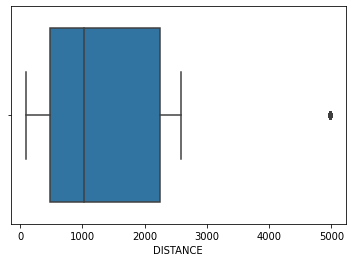

In [81]:
sns.boxplot(x = data_flight_take_off_clean_pd['DISTANCE'])

In [83]:
data_flight_take_off_clean.where( data_flight_take_off_clean.DISTANCE > 4000 ).select("*").count()

102

In [88]:
data_flight_take_off_clean.where( data_flight_take_off_clean.DISTANCE > 4000 ).select("DISTANCE").distinct().show()

+--------+
|DISTANCE|
+--------+
|    4983|
+--------+



In [89]:
data_flight_take_off_clean.where( data_flight_take_off_clean.DISTANCE > 4000 ).select("*").show()

+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+--------------------+-------+-------+--------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|TAIL_NUM|DEST|DEP_DELAY|CRS_ELAPSED_TIME|DISTANCE|CRS_DEP_M|DEP_TIME_M|CRS_ARR_M|Temperature|Dew Point|Humidity|Wind|Wind Speed|Wind Gust|Pressure|           Condition|sch_dep|sch_arr|TAXI_OUT|
+-----+------------+-----------+-----------------+--------+----+---------+----------------+--------+---------+----------+---------+-----------+---------+--------+----+----------+---------+--------+--------------------+-------+-------+--------+
|   11|           1|          5|               HA|  N360HA| HNL|        0|             660|    4983|      600|       600|      900|         54|       32|      43|   W|        21|       33|   30.05|        Fair / Windy|     16|     19|      15|
|   11|           2|    

**จากการหาข้อมูล สามารถบอกได้ว่าค่าOutliers เป็นค่าที่ถูกต้องเพราะเส้นทางจากJFK Airport ถึง HNL Airport(ฮาวาย) ใช้ระยะทางประมาณ 4,972 ไมล์ ดังรูปต่อไปนี้**

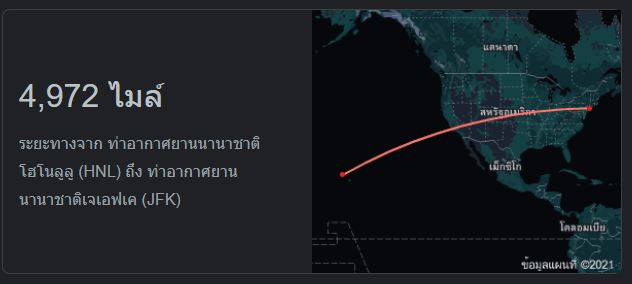



---



# Save File เป็น .CSV

In [90]:
data_flight_take_off_clean.coalesce(1).write.csv('Flight_Take_Off_Data-JFK_Airport-Data_Clean.csv', header = True)